## Project Dependencies

In [1]:
import gdown
import ppscore as pps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import utils as ut
plt.style.use('dark_background')
%matplotlib inline

## Data Extraction
*****
*  Here, we will extract our data from remote storage
*  After extracting our data we will filter out ans extract data that is
   related to Somalia to initiate data pre-processing

In [2]:
url = 'https://drive.google.com/uc?id=19-RDOUNbwbYc6hOJMbP7NFgr4X4CR5Vz'
output = 'notebooks/gtd_data.xlsx'

gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=19-RDOUNbwbYc6hOJMbP7NFgr4X4CR5Vz
To: /Users/ahmedgaal/ml-capstone/notebooks/gtd_data.xlsx
94.5MB [01:27, 1.08MB/s]


'notebooks/gtd_data.xlsx'

#### Load our data in to a pandas DataFrame

In [2]:
df = pd.read_excel('gtd_data.xlsx')

#### Slice our data to retrieve data that relates to Somalia

In [3]:
df.isna().any().sum()

104

In [4]:
som_df = df.groupby(['country_txt']).get_group('Somalia').copy()

In [5]:
som_df.shape

(4674, 135)

In [6]:
som_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4674 entries, 2895 to 191405
Columns: 135 entries, eventid to related
dtypes: datetime64[ns](1), float64(53), int64(24), object(57)
memory usage: 4.8+ MB


In [7]:
som_df.isna().any().sum()

99

In [8]:
som_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
2895,197503250001,1975,3,25,NaN,1,1975-03-30,182,Somalia,11,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
10569,198004000001,1980,4,0,NaN,0,NaT,182,Somalia,11,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
12580,198101000006,1981,1,0,NaN,0,NaT,182,Somalia,11,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
12581,198101000007,1981,1,0,NaN,0,NaT,182,Somalia,11,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
12582,198101000008,1981,1,0,NaN,0,NaT,182,Somalia,11,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN


#### Reset the index

In [9]:
som_df.reset_index(drop=True, inplace=True)

## Data Pre-Processing

In [10]:
som_df.dropna(axis=1, inplace=True)

In [11]:
som_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4674 entries, 0 to 4673
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   eventid          4674 non-null   int64  
 1   iyear            4674 non-null   int64  
 2   imonth           4674 non-null   int64  
 3   iday             4674 non-null   int64  
 4   extended         4674 non-null   int64  
 5   country          4674 non-null   int64  
 6   country_txt      4674 non-null   object 
 7   region           4674 non-null   int64  
 8   region_txt       4674 non-null   object 
 9   provstate        4674 non-null   object 
 10  city             4674 non-null   object 
 11  specificity      4674 non-null   float64
 12  vicinity         4674 non-null   int64  
 13  crit1            4674 non-null   int64  
 14  crit2            4674 non-null   int64  
 15  crit3            4674 non-null   int64  
 16  doubtterr        4674 non-null   int64  
 17  multiple      

* Rename column names to more descriptive names

In [12]:
som_df.rename(columns={
    'iyear': 'year',
    'imonth': 'month',
    'iday': 'day',
    'country_txt': 'country_name',
    'region_txt': 'region_name',
    'attacktype1': 'attack_type',
    'attacktype1_txt': 'attack_name',
    'targtype1': 'target_type',
    'targtype1_txt': 'target_name',
    'gname': 'group_name',
    'weaptype1': 'weapon_type',
    'weaptype1_txt': 'weapon_name',
    'crit1': 'criteria_1',
    'crit2': 'criteria_2',
    'crit3': 'criteria_3',
    'doubtterr': 'doubt_terrorism',
    'provstate': 'state',
    'ishostkid': 'hostage_kidnap'
}, inplace=True)

* Drop irrelevant indices

In [13]:
ut.clean_irrelevant_index(som_df, 'day', 0)
ut.clean_irrelevant_index(som_df, 'month', 0)

,eventid,year,month,day,extended,country,country_name,region,region_name,state,...,individual,weapon_type,weapon_name,property,hostage_kidnap,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197503250001,1975,3,25,1,182,Somalia,11,Sub-Saharan Africa,Banaadir,...,0,13,Unknown,0,1.0,PGIS,0,1,1,1
8,198101270009,1981,1,27,0,182,Somalia,11,Sub-Saharan Africa,Banaadir,...,0,6,Explosives,1,0.0,PGIS,0,0,0,0
9,198101270010,1981,1,27,0,182,Somalia,11,Sub-Saharan Africa,Banaadir,...,0,6,Explosives,1,0.0,PGIS,0,0,0,0
10,198304280001,1983,4,28,0,182,Somalia,11,Sub-Saharan Africa,Banaadir,...,0,6,Explosives,1,0.0,PGIS,0,0,0,0
11,198407190001,1984,7,19,0,182,Somalia,11,Sub-Saharan Africa,Woqooyi Galbeed,...,0,6,Explosives,1,0.0,PGIS,-9,-9,0,-9


* Generate a new Date feature 

In [14]:
som_df['Date'] = pd.to_datetime(
    som_df.year.astype(str) + '-' + som_df.month.astype(str) + '-' + som_df.day.astype(str)
)

In [15]:
# Before 1997, instance where There is essentially no doubt as to whether the incident is an act of terrorism was recorded as -9
# so we need to change it to 0.
for index in som_df.index:
    if som_df.loc[index, 'doubt_terrorism'] == -9:
        som_df.loc[index, 'doubt_terrorism'] = 0

In [16]:
som_df.reset_index(drop=True, inplace=True)

In [17]:
som_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4656 entries, 0 to 4655
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   eventid          4656 non-null   int64         
 1   year             4656 non-null   int64         
 2   month            4656 non-null   int64         
 3   day              4656 non-null   int64         
 4   extended         4656 non-null   int64         
 5   country          4656 non-null   int64         
 6   country_name     4656 non-null   object        
 7   region           4656 non-null   int64         
 8   region_name      4656 non-null   object        
 9   state            4656 non-null   object        
 10  city             4656 non-null   object        
 11  specificity      4656 non-null   float64       
 12  vicinity         4656 non-null   int64         
 13  criteria_1       4656 non-null   int64         
 14  criteria_2       4656 non-null   int64  

In [18]:
irrelevant = ['dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY',
              'eventid', 'country', 'country_name', 'region_name', 'region',
              'individual']

som_df.drop(irrelevant, axis=1, inplace=True)

In [19]:
som_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4656 entries, 0 to 4655
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   year             4656 non-null   int64         
 1   month            4656 non-null   int64         
 2   day              4656 non-null   int64         
 3   extended         4656 non-null   int64         
 4   state            4656 non-null   object        
 5   city             4656 non-null   object        
 6   specificity      4656 non-null   float64       
 7   vicinity         4656 non-null   int64         
 8   criteria_1       4656 non-null   int64         
 9   criteria_2       4656 non-null   int64         
 10  criteria_3       4656 non-null   int64         
 11  doubt_terrorism  4656 non-null   int64         
 12  multiple         4656 non-null   int64         
 13  success          4656 non-null   int64         
 14  suicide          4656 non-null   int64  

## Exploratory Data Analysis

In [20]:
som_df.describe()

,year,month,day,extended,specificity,vicinity,criteria_1,criteria_2,criteria_3,doubt_terrorism,multiple,success,suicide,attack_type,target_type,guncertain1,weapon_type,property,hostage_kidnap
count,4656.000000,4656.000000,4656.000000,4656.000000,4656.000000,4656.000000,4656.000000,4656.000000,4656.000000,4656.000000,4656.000000,4656.000000,4656.000000,4656.000000,4656.000000,4656.000000,4656.000000,4656.000000,4656.000000
mean,2013.385954,6.505155,15.691796,0.060567,1.211555,0.082474,0.996993,0.990979,0.662371,0.362328,0.106959,0.914304,0.046821,3.347294,6.526418,0.133591,6.733892,-2.185567,0.079897
std,4.884651,3.329776,8.893966,0.238560,0.657211,0.275115,0.054758,0.094558,0.472952,0.480725,0.309094,0.279945,0.211279,2.221824,5.143123,0.340249,2.662275,4.253606,0.477704
min,1975.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000,-9.000000,-9.000000
25%,2012.000000,4.000000,8.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,3.000000,0.000000,5.000000,-9.000000,0.000000
50%,2014.000000,7.000000,16.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,4.000000,0.000000,6.000000,0.000000,0.000000
75%,2016.000000,9.000000,24.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,12.000000,0.000000,6.000000,1.000000,0.000000
max,2018.000000,12.000000,31.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,22.000000,1.000000,13.000000,1.000000,1.000000


<AxesSubplot:>

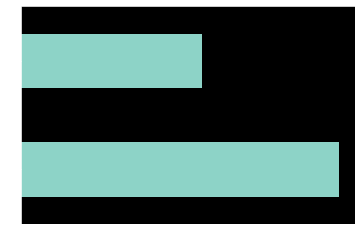

In [21]:
som_df['doubt_terrorism'].value_counts().plot(kind='barh')

<Figure size 1152x720 with 0 Axes>

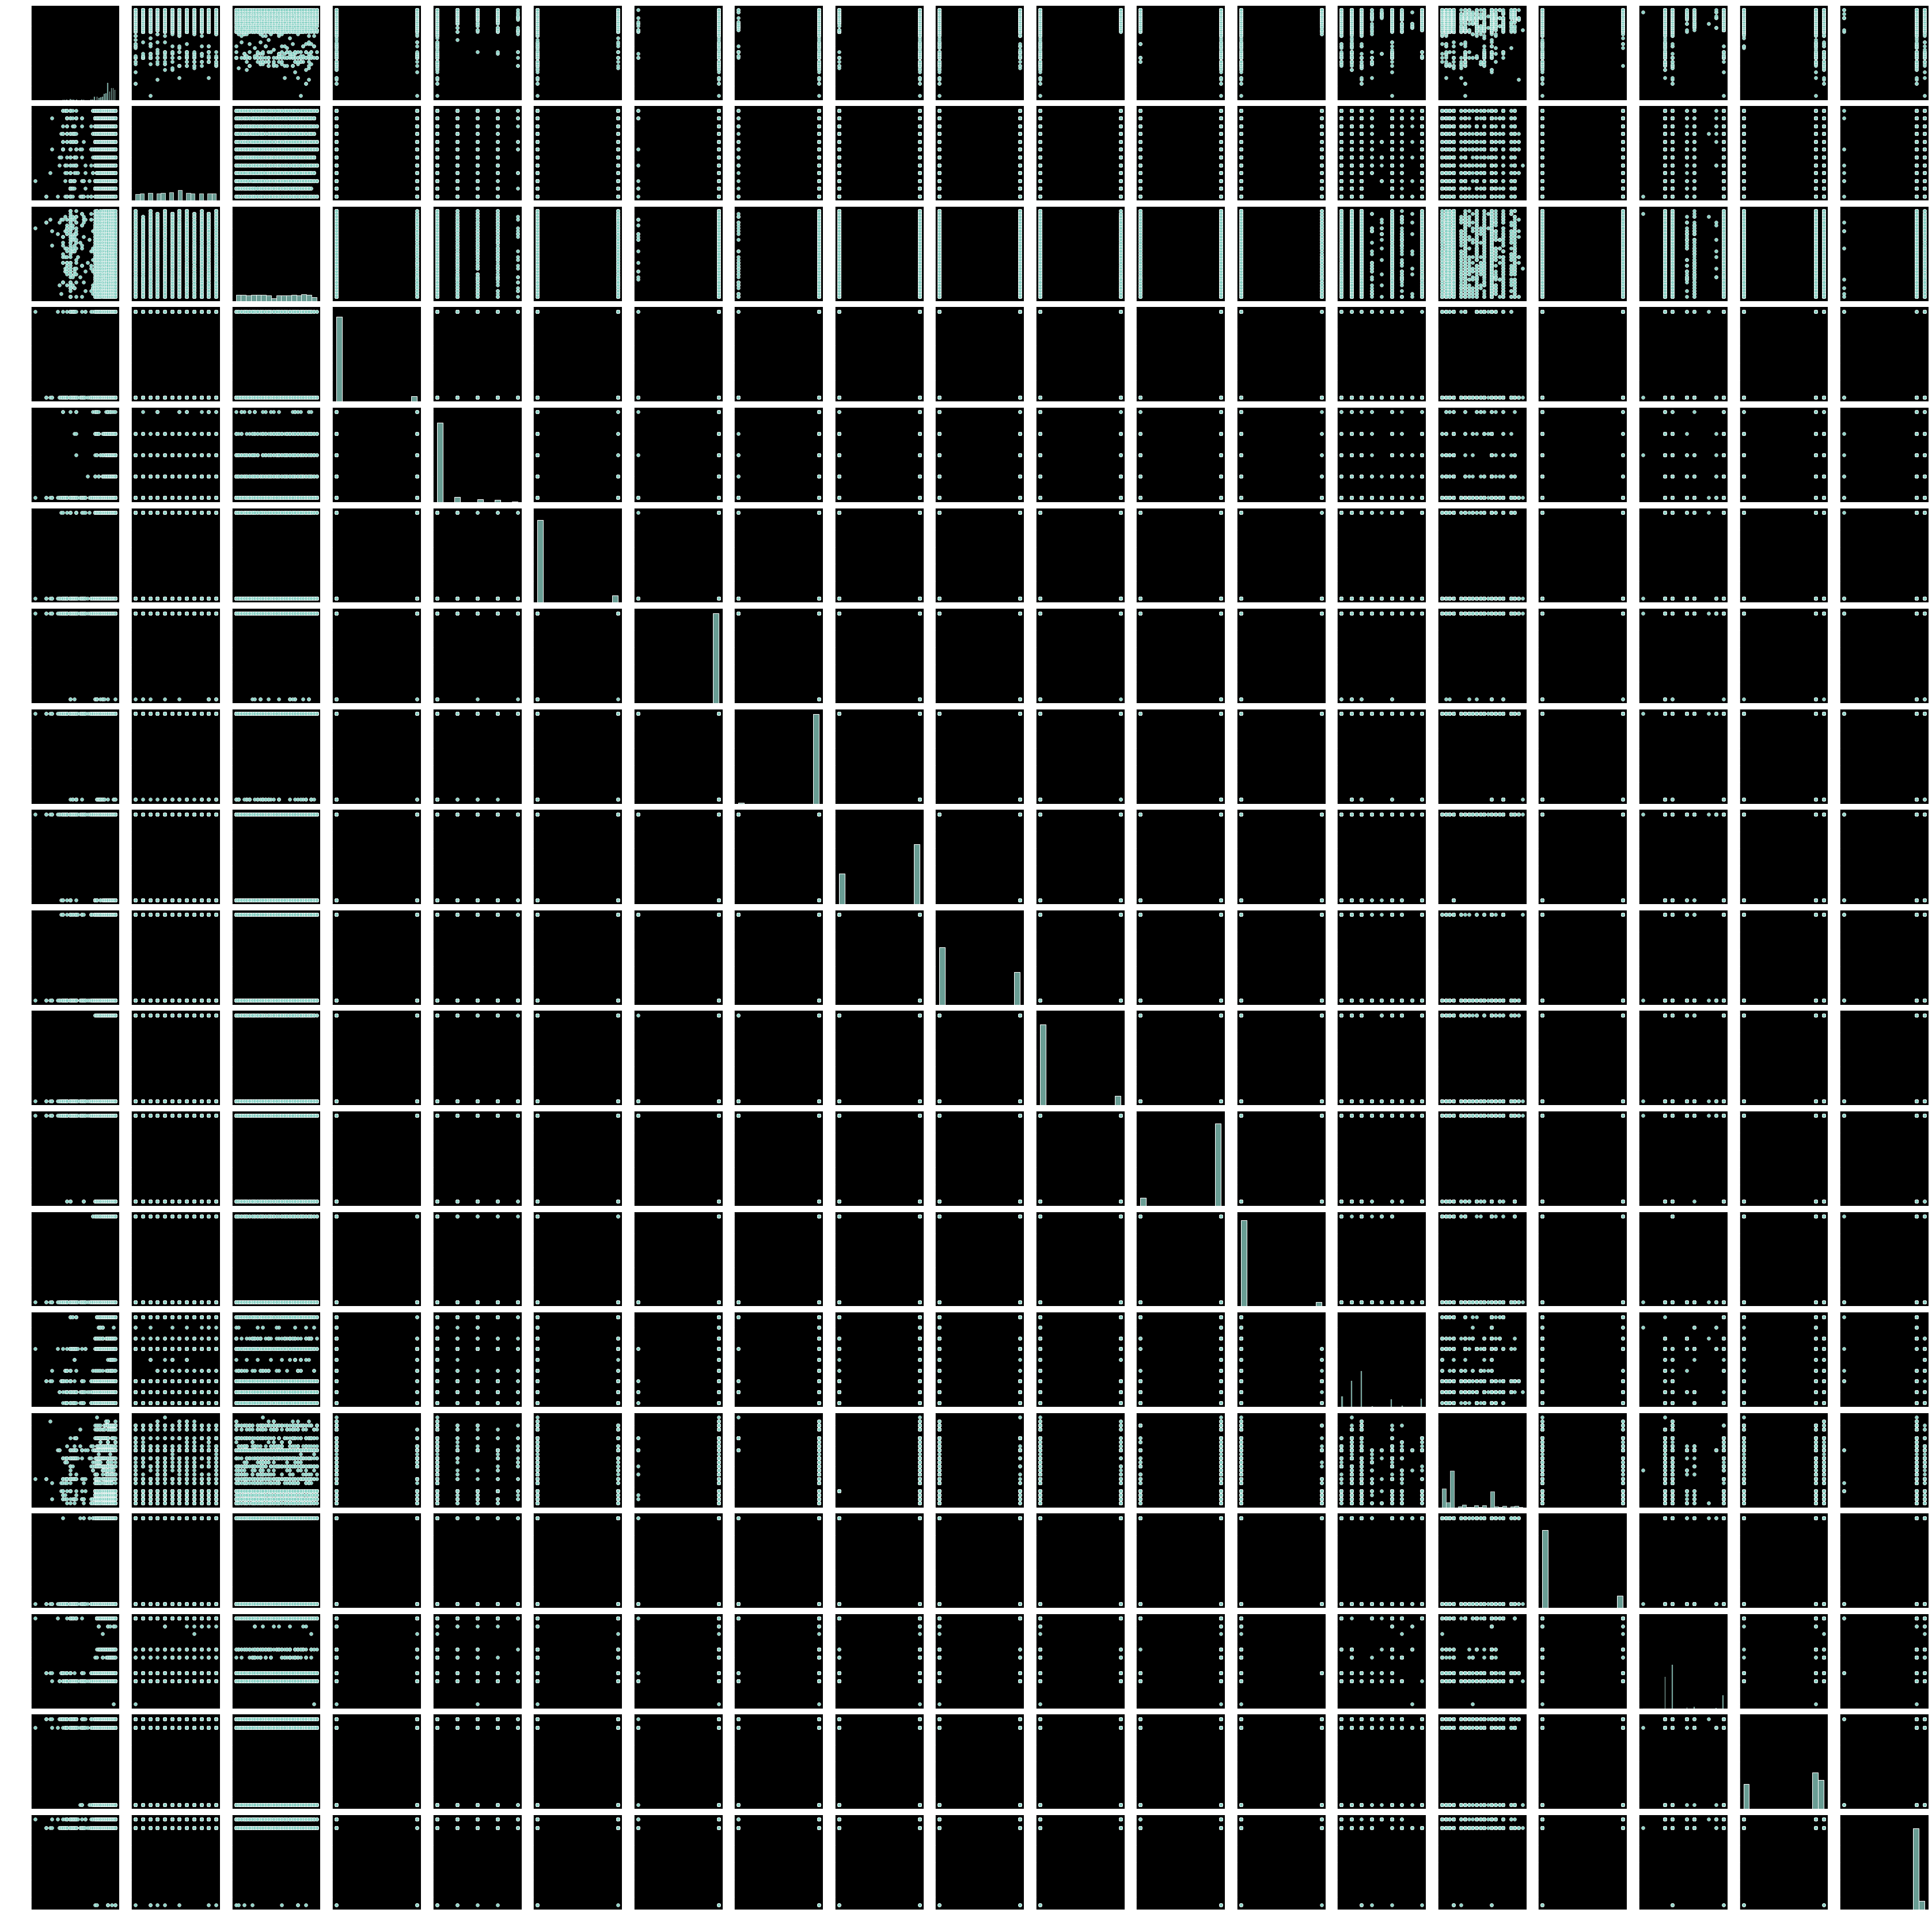

In [22]:
plt.figure(figsize=(16, 10))
sb.pairplot(som_df)
plt.show()

<AxesSubplot:title={'center':'Predictive Power Score Heatmap'}, xlabel='feature', ylabel='target'>

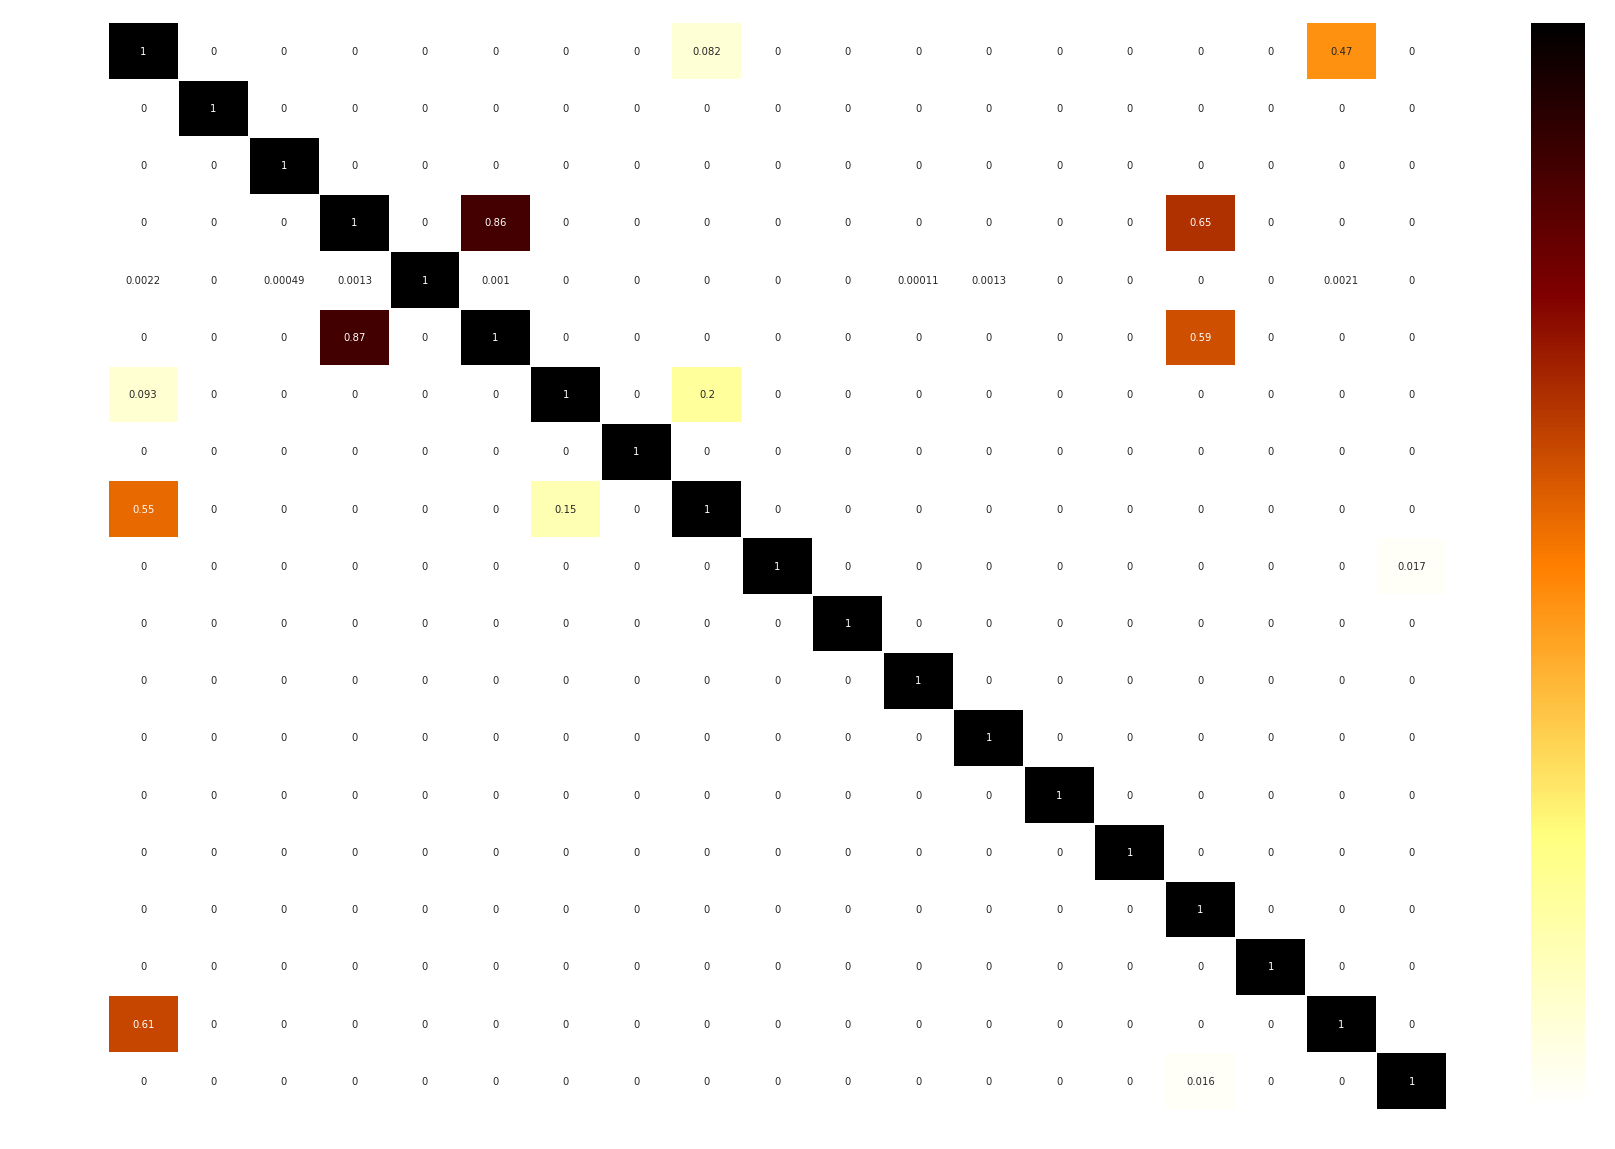

In [23]:
ut.pps_heatmap(som_df[list(som_df.describe().columns)])

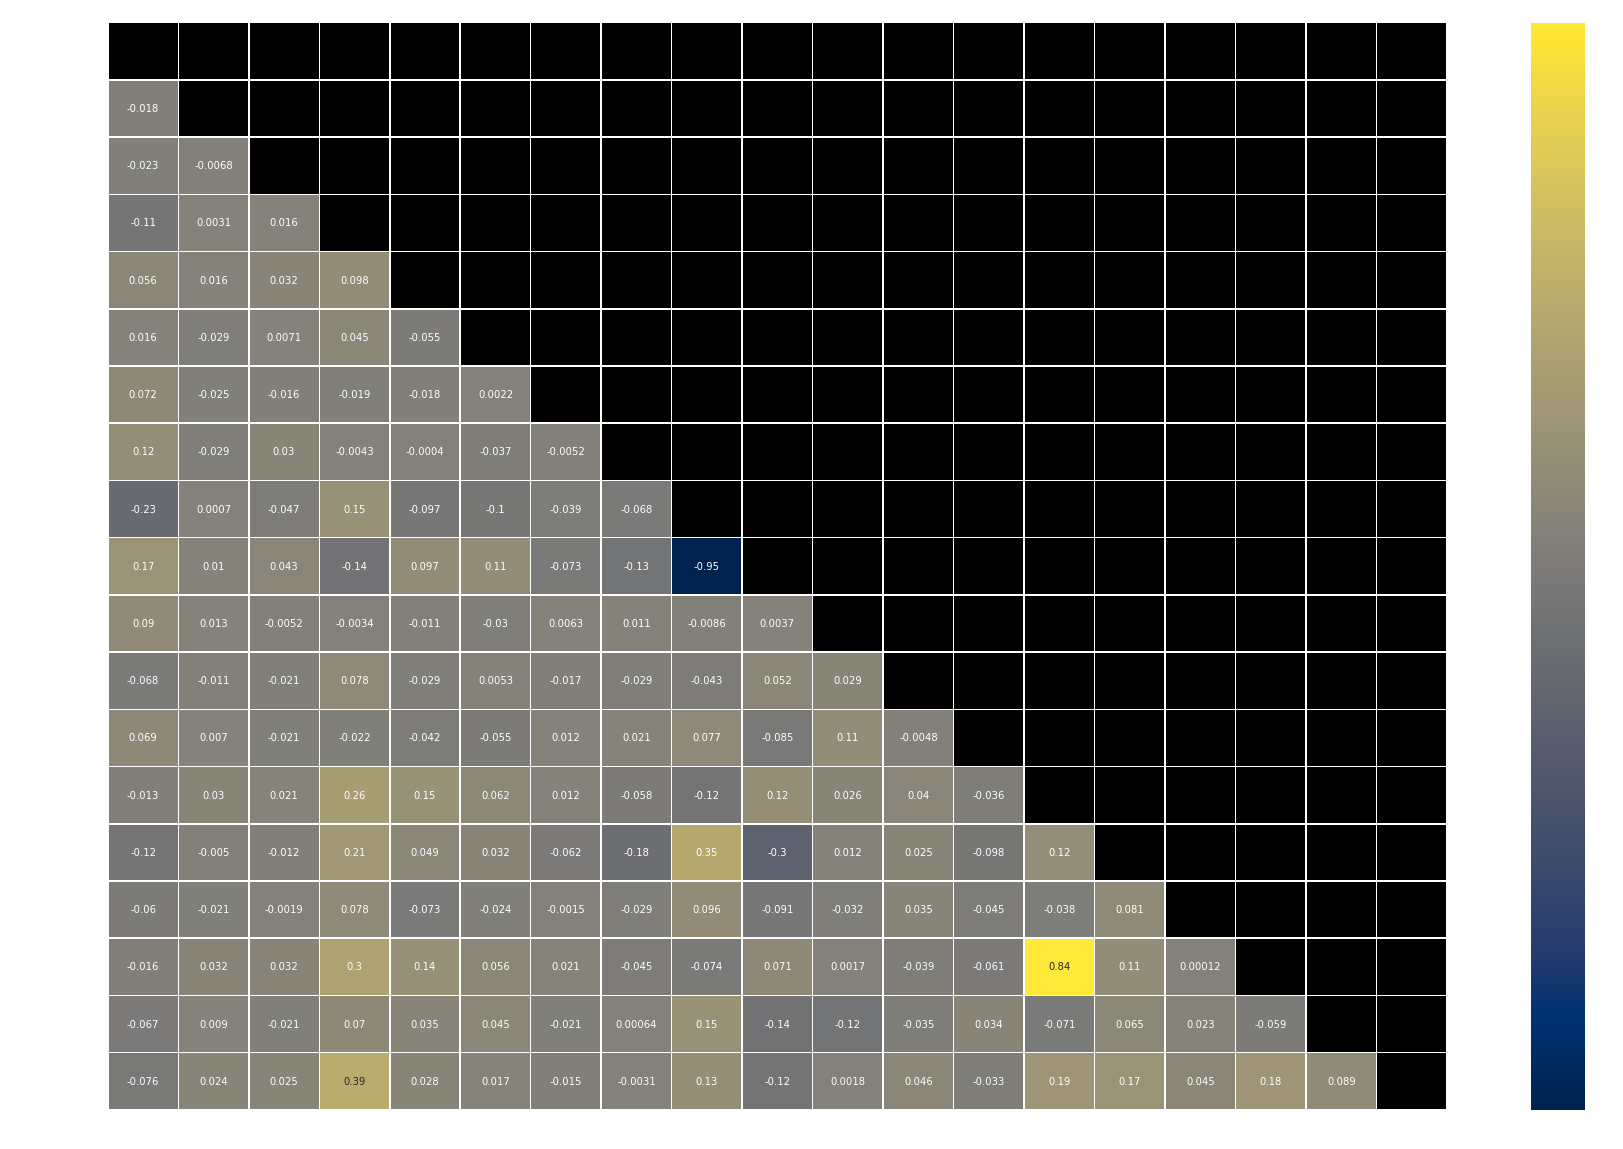

In [24]:
ut.corr_heatmap(som_df, mask=True)

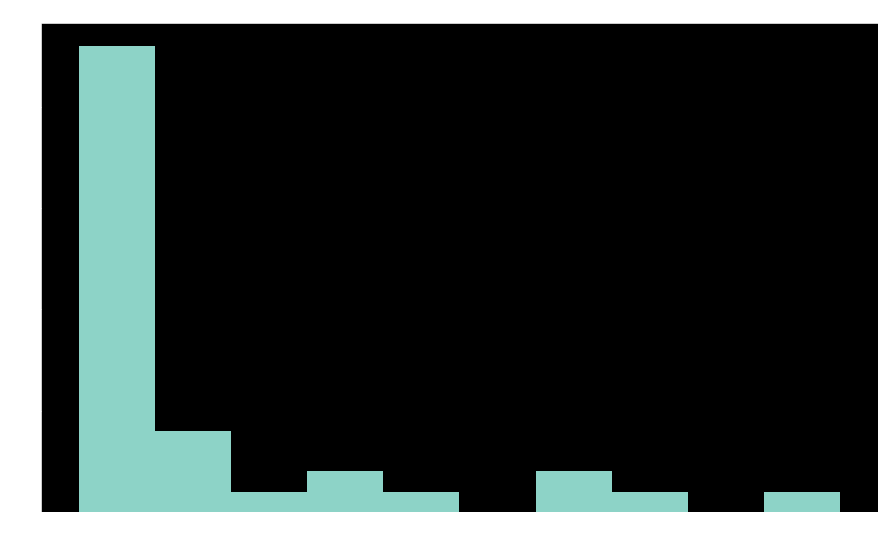

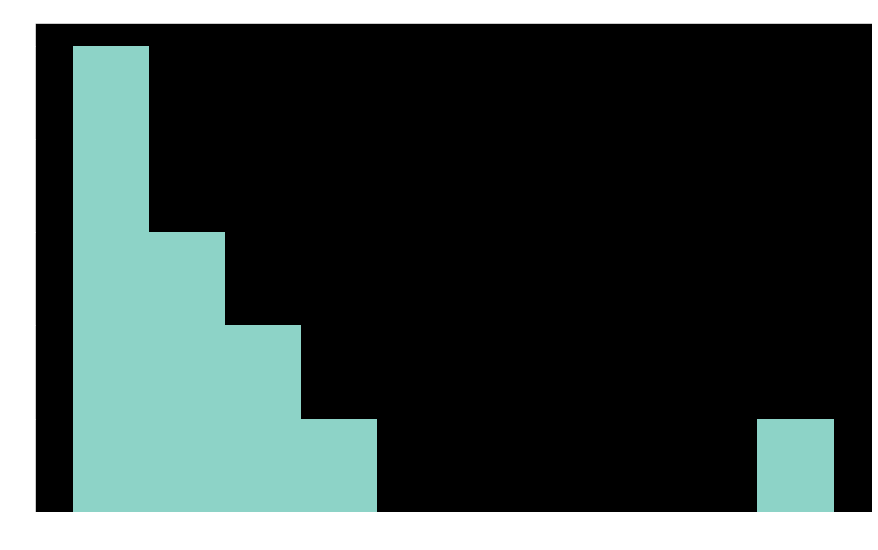

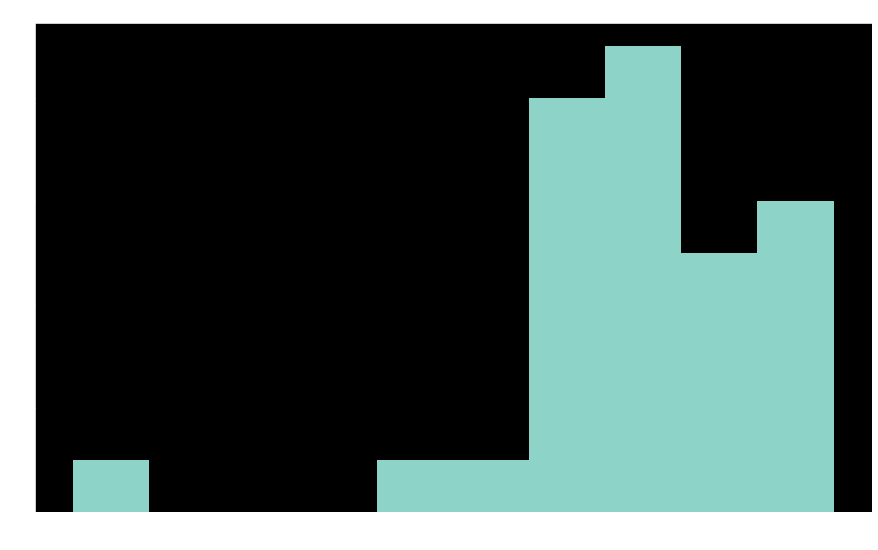

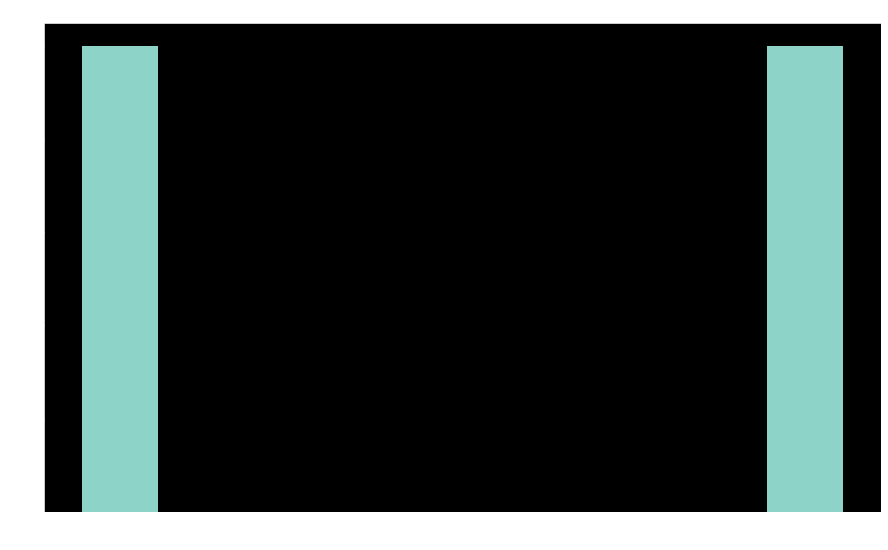

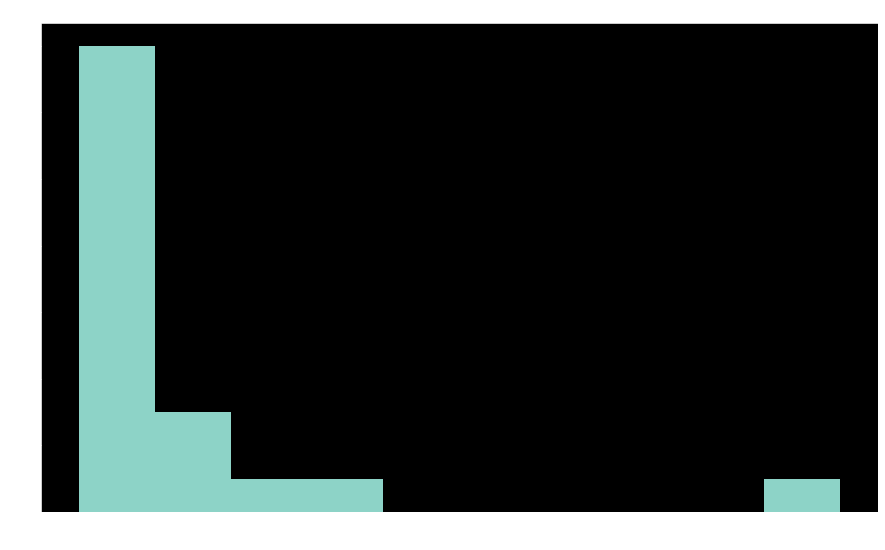

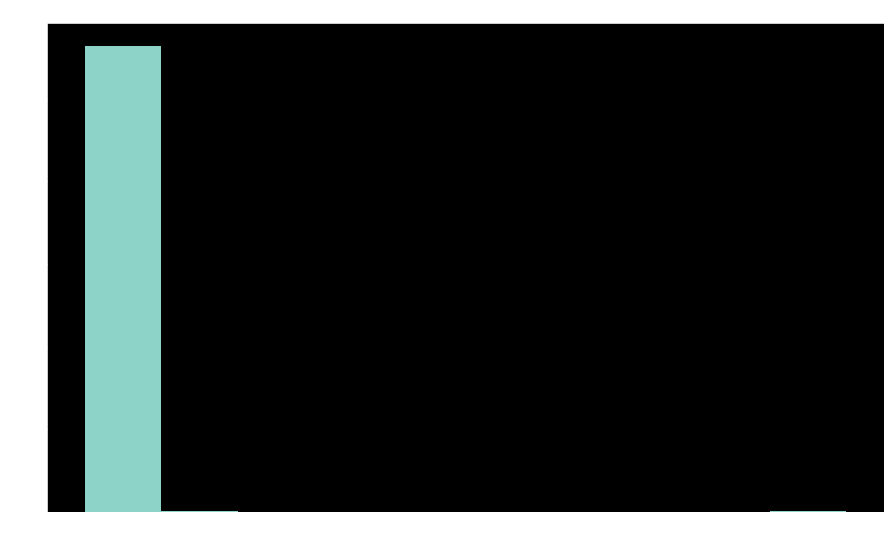

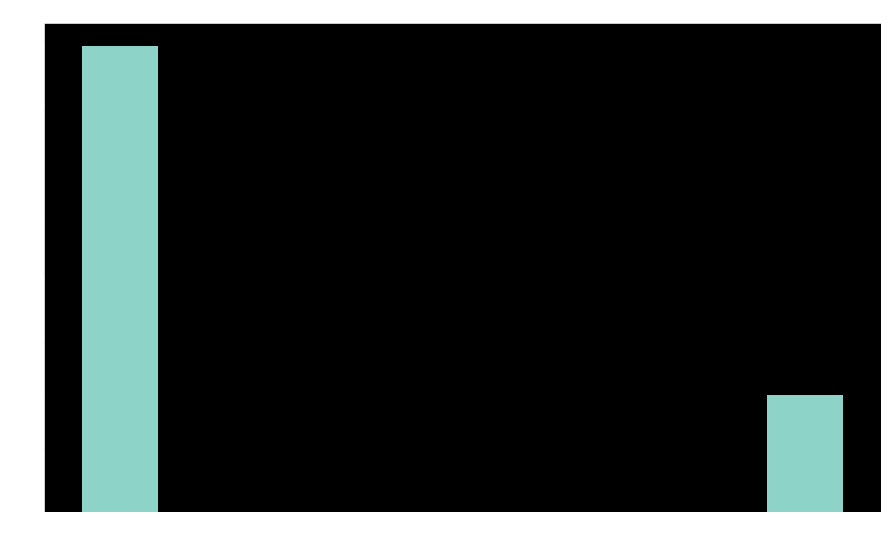

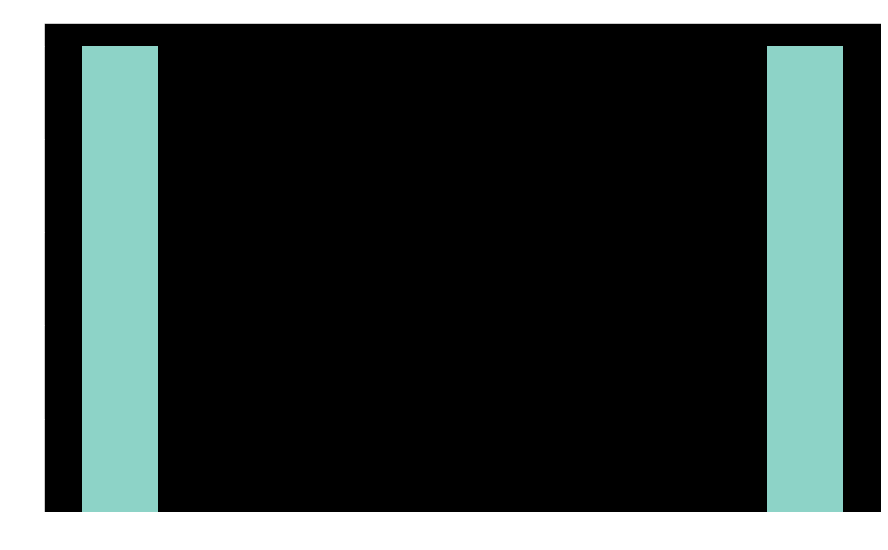

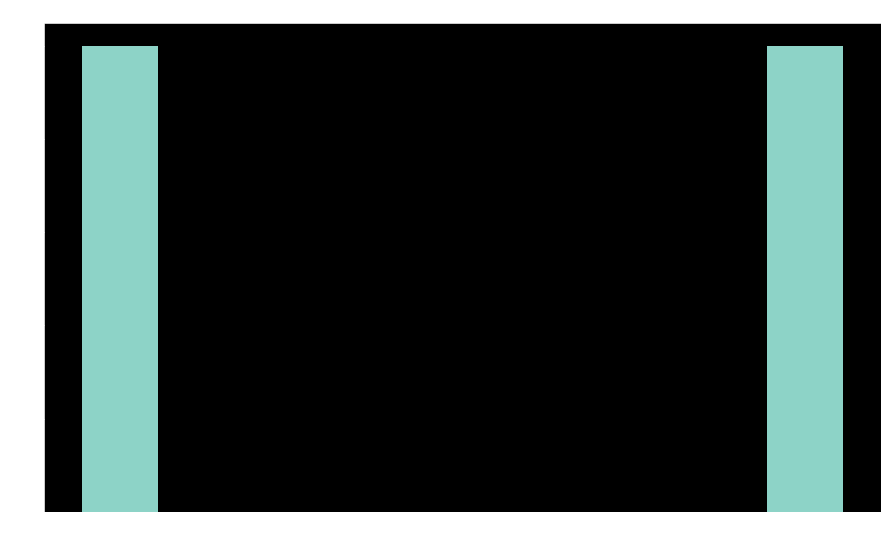

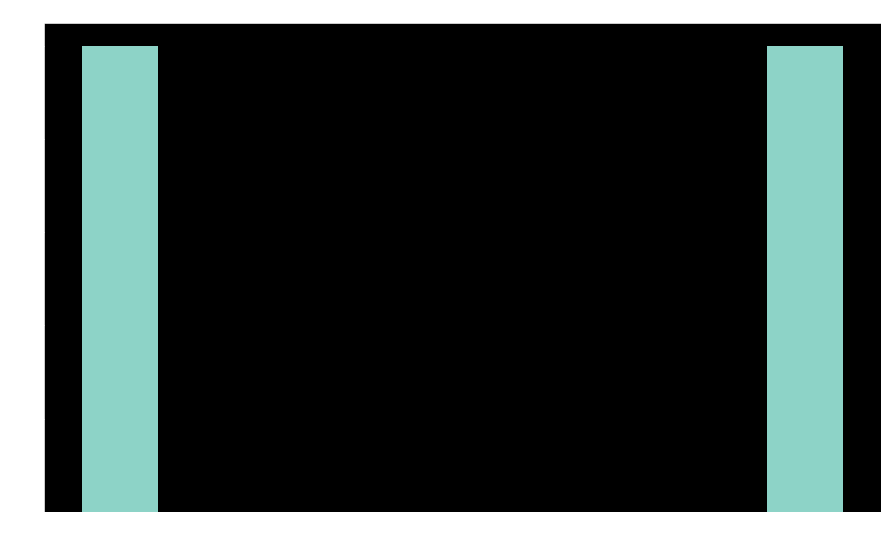

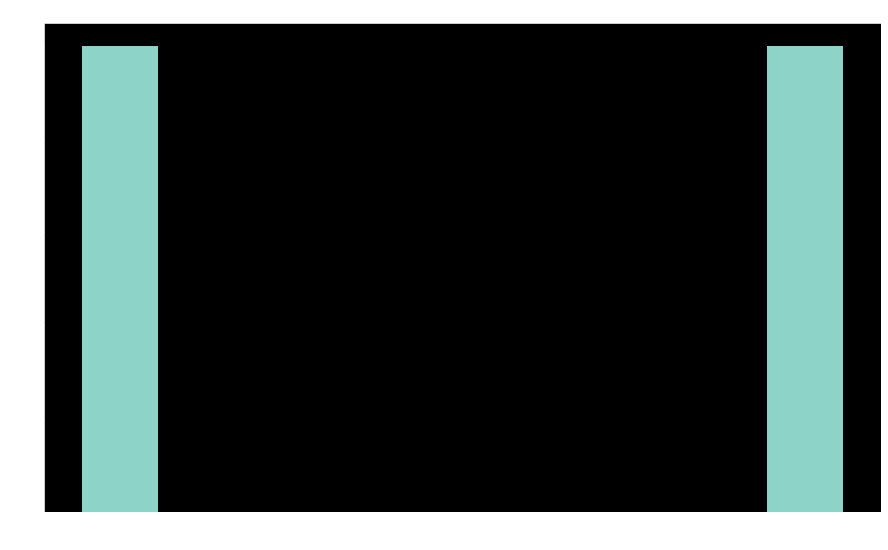

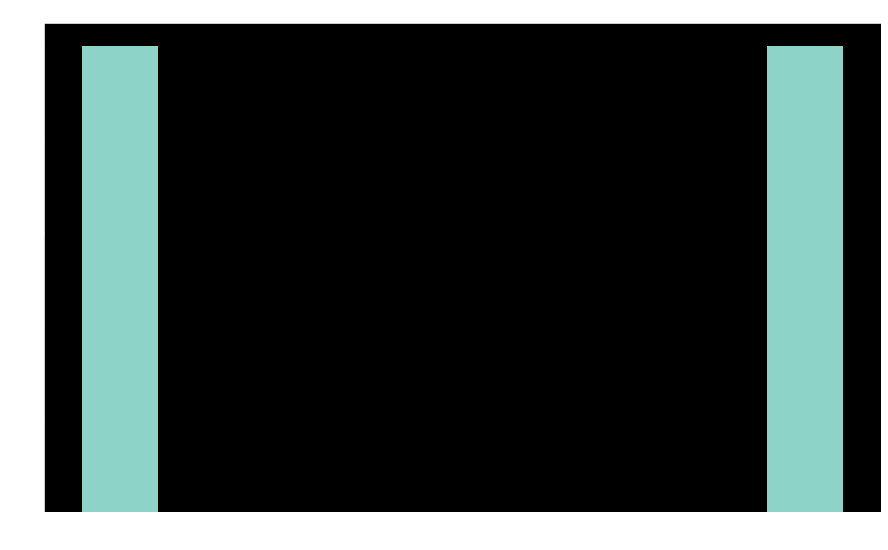

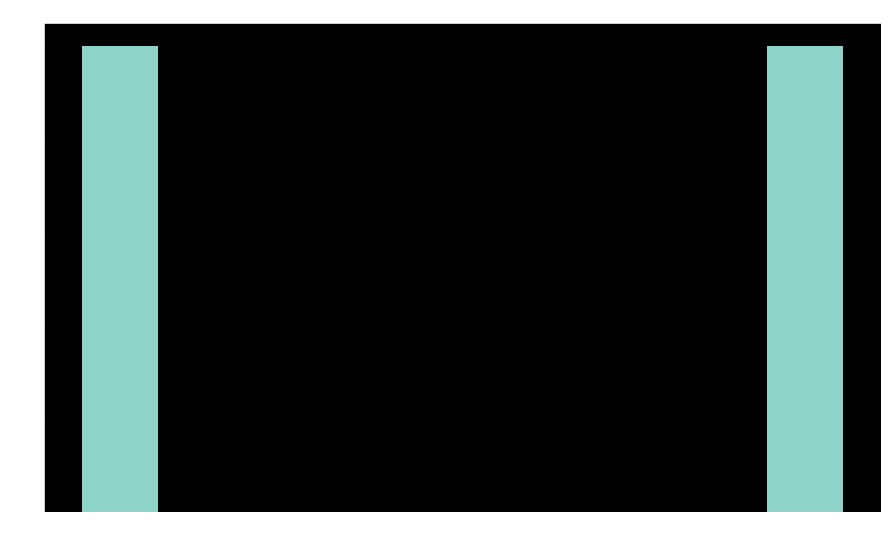

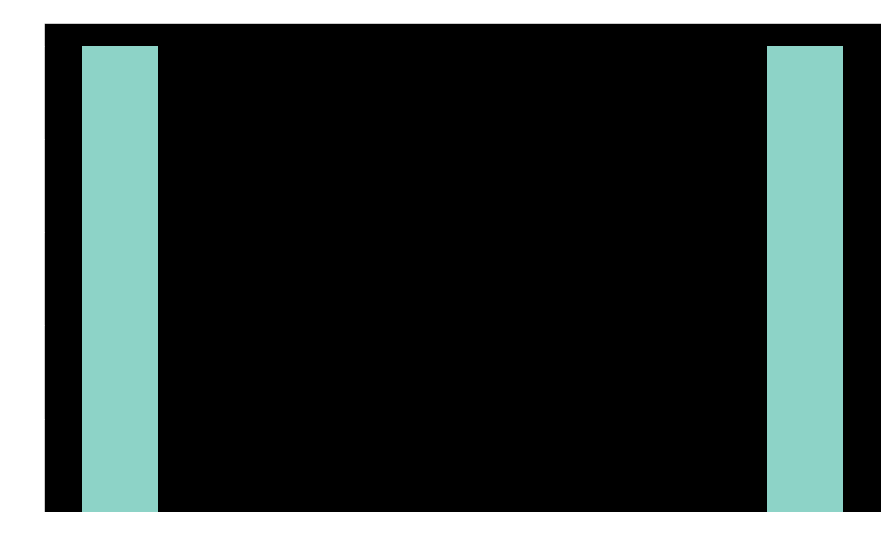

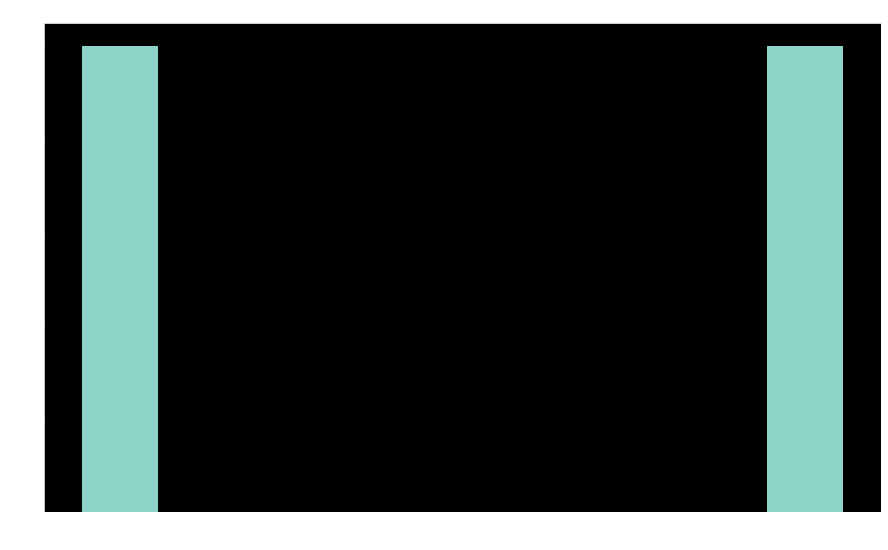

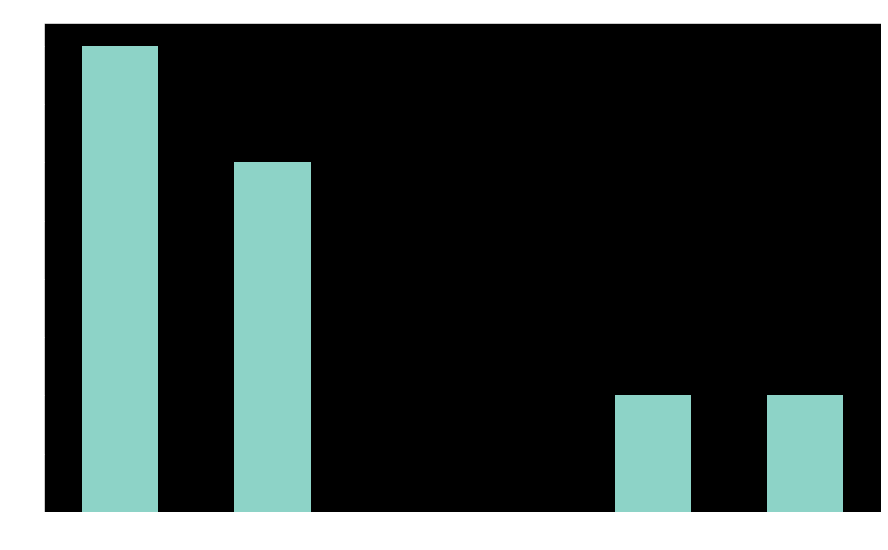

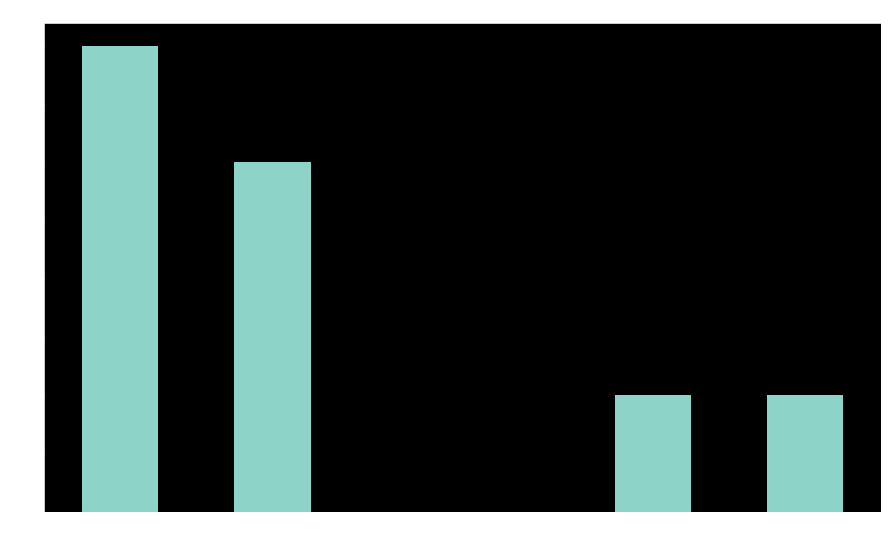

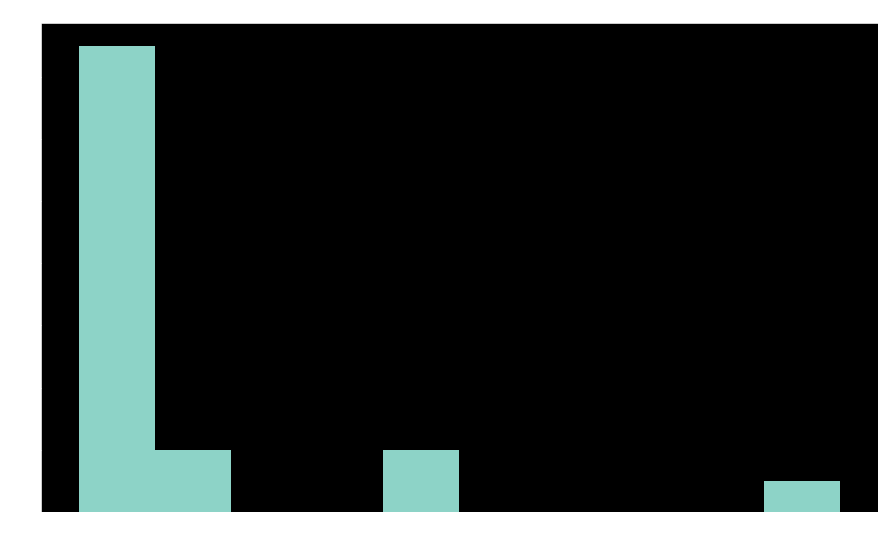

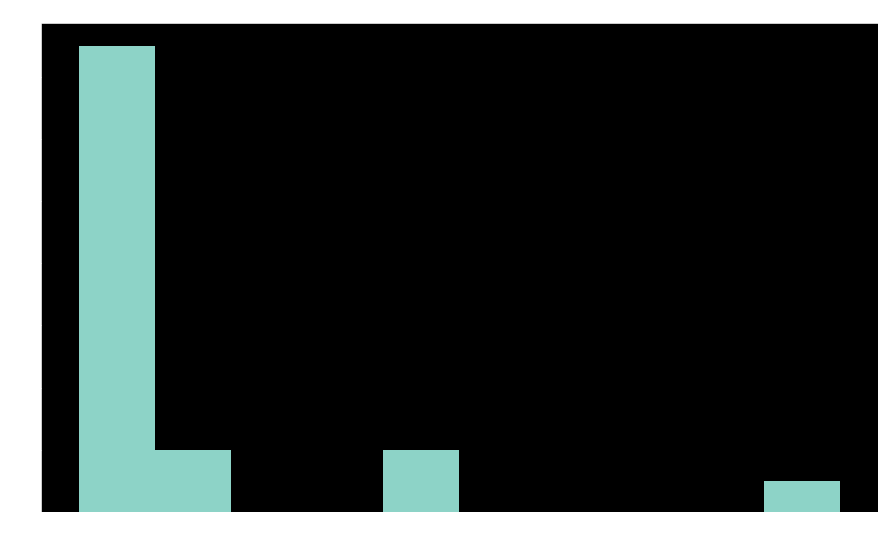

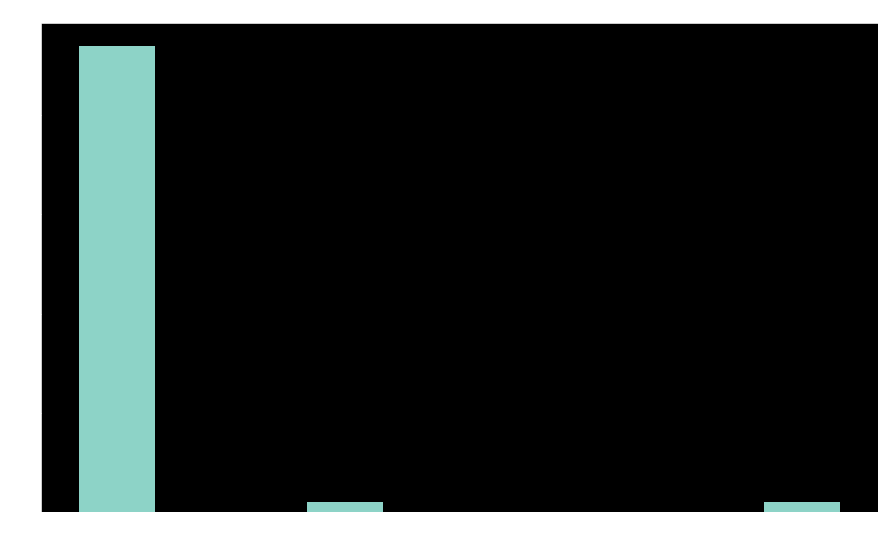

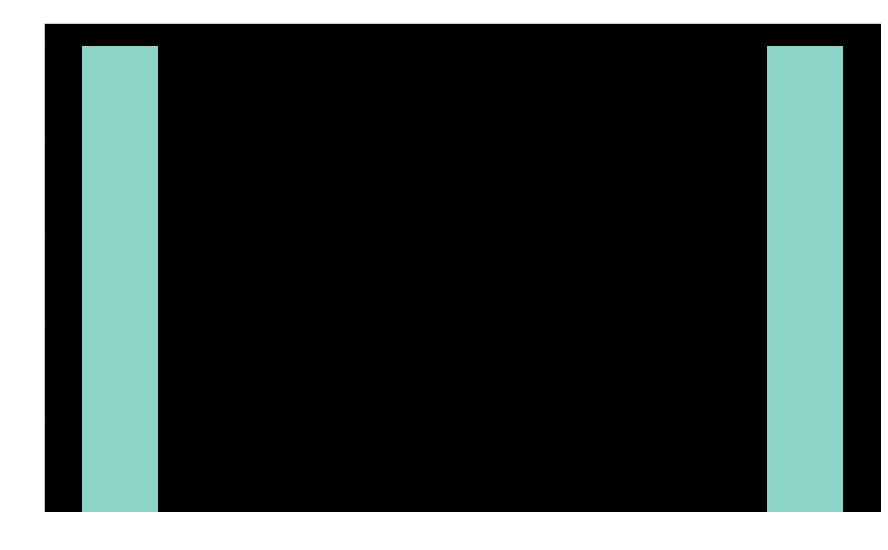

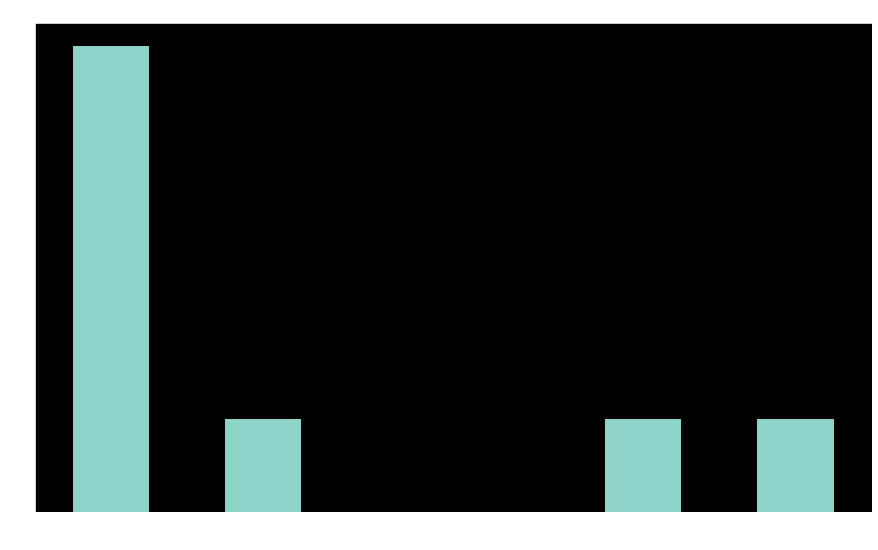

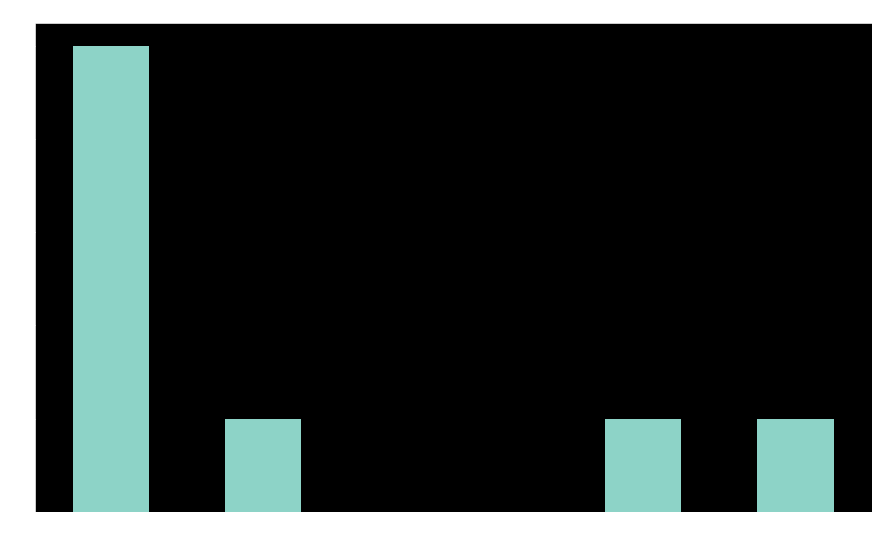

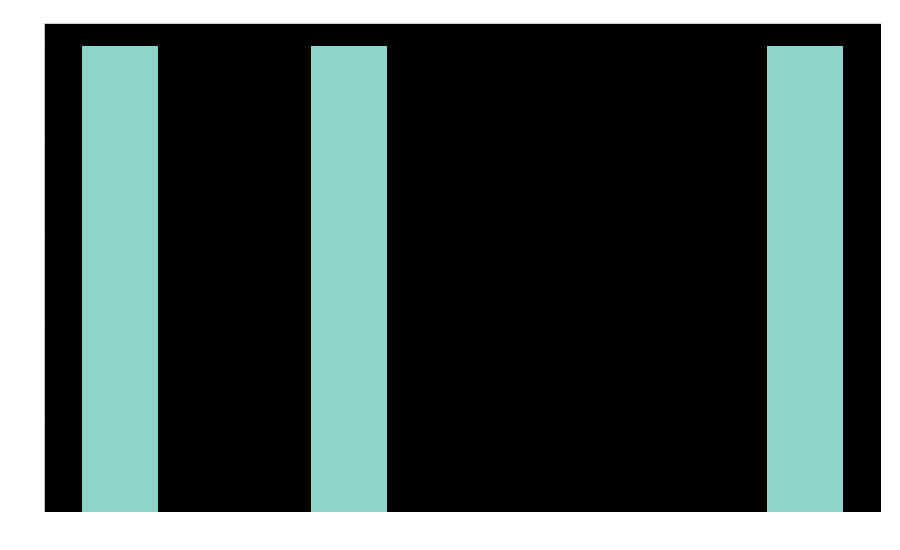

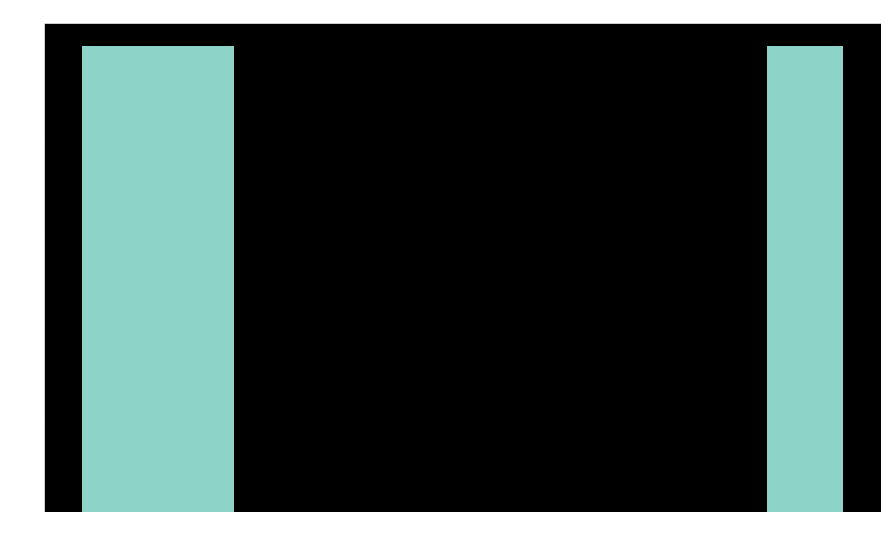

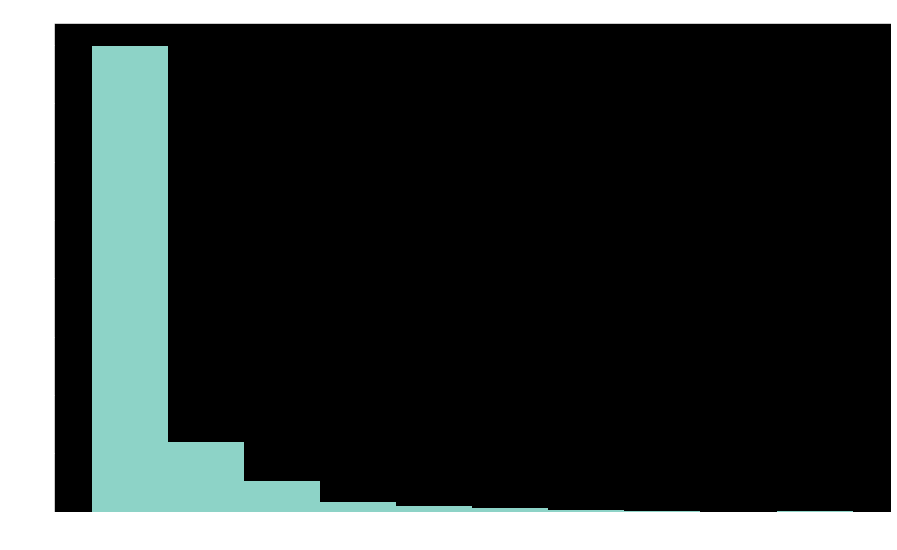

In [25]:
for col in list(som_df.columns):
    plt.figure(figsize=(15, 9))
    plt.title(str(col))
    plt.ylabel(str(col))
    plt.xlabel('Values')
    som_df[str(col)].value_counts().plot(kind='hist')
    plt.show()

## Feature Extraction


* Fist Objective is:
  > Classify whether the events constitute as an act of terrorism and those that do not.

In [26]:
features = ['year', 'month', 'day', 'extended', 'specificity', 'vicinity',
            'criteria_1', 'criteria_2', 'criteria_3', 'multiple', 'success',
            'suicide', 'attack_type', 'target_type', 'guncertain1',
            'weapon_type', 'property','hostage_kidnap']
 
X = som_df.loc[:, features]
y = som_df.loc[:, 'doubt_terrorism']

### Spliting data to train and test at a ratio of 80% - 20% respectively 

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Model Training & Selection

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

### Decision Tree Classification

In [29]:
tree = DecisionTreeClassifier()
scale = StandardScaler()

[Pipeline] ............. (step 1 of 2) Processing scale, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.0s
Accuracy Score: 0.965665
Precision Score: 0.94
Recall Score: 0.97
F1 Score: 0.95
Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       599
           1       0.94      0.97      0.95       333

    accuracy                           0.97       932
   macro avg       0.96      0.97      0.96       932
weighted avg       0.97      0.97      0.97       932
 



Predicted     
                  No  Yes
Actual No        578   21
       Yes        11  322

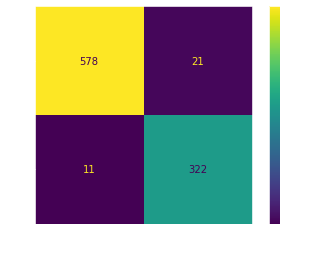

In [30]:
ut.model_selection(tree, scale, X_train, y_train, X_test, y_test)

### Logistic Regression

[Pipeline] ............. (step 1 of 2) Processing scale, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.0s
Accuracy Score: 0.986052
Precision Score: 1.00
Recall Score: 0.96
F1 Score: 0.98
Classification Report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       599
           1       1.00      0.96      0.98       333

    accuracy                           0.99       932
   macro avg       0.99      0.98      0.98       932
weighted avg       0.99      0.99      0.99       932
 



Predicted     
                  No  Yes
Actual No        599    0
       Yes        13  320

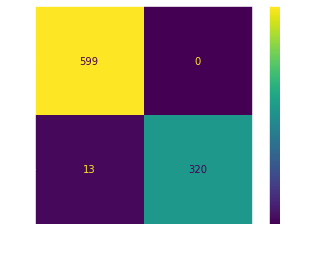

In [31]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=800)

ut.model_selection(log, scale, X_train, y_train, X_test, y_test)

### Support Vector Machines
> Support Vector Classification (Linear Kernel)

In [32]:
from sklearn.svm import SVC

In [33]:
svc = SVC(C=1, kernel='linear')

[Pipeline] ............. (step 1 of 2) Processing scale, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.0s
Accuracy Score: 0.986052
Precision Score: 1.00
Recall Score: 0.96
F1 Score: 0.98
Classification Report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       599
           1       1.00      0.96      0.98       333

    accuracy                           0.99       932
   macro avg       0.99      0.98      0.98       932
weighted avg       0.99      0.99      0.99       932
 



Predicted     
                  No  Yes
Actual No        599    0
       Yes        13  320

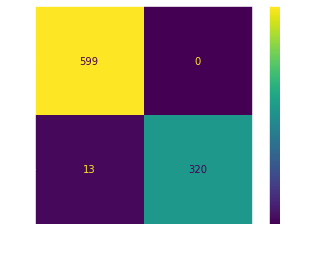

In [34]:
ut.model_selection(svc, scale, X_train, y_train, X_test, y_test)

### Using Random Forest Classifer

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf = RandomForestClassifier(n_estimators=7100)

[Pipeline] ............. (step 1 of 2) Processing scale, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing estimator, total=  13.8s
Accuracy Score: 0.988197
Precision Score: 1.00
Recall Score: 0.97
F1 Score: 0.98
Classification Report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       599
           1       1.00      0.97      0.98       333

    accuracy                           0.99       932
   macro avg       0.99      0.98      0.99       932
weighted avg       0.99      0.99      0.99       932
 



Predicted     
                  No  Yes
Actual No        599    0
       Yes        11  322

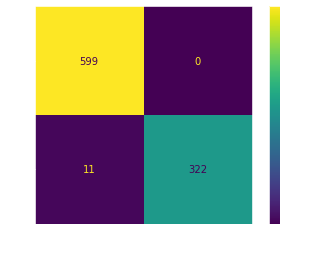

In [37]:
ut.model_selection(rf, scale, X_train, y_train, X_test, y_test)

### Using Gradient Boosting Machines
> Gradient Boosting Classifier

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
gbm = GradientBoostingClassifier()

[Pipeline] ............. (step 1 of 2) Processing scale, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
Accuracy Score: 0.984979
Precision Score: 1.00
Recall Score: 0.96
F1 Score: 0.98
Classification Report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       599
           1       1.00      0.96      0.98       333

    accuracy                           0.98       932
   macro avg       0.99      0.98      0.98       932
weighted avg       0.99      0.98      0.98       932
 



Predicted     
                  No  Yes
Actual No        598    1
       Yes        13  320

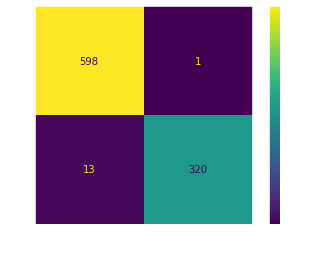

In [40]:
ut.model_selection(gbm, scale, X_train, y_train, X_test, y_test)

> Using Extreme Gradient Boosting

In [41]:
from xgboost import XGBClassifier

In [42]:
xgb = XGBClassifier(objective='binary:logistic', eval_metric='auc',
                    use_label_encoder=False)

[Pipeline] ............. (step 1 of 2) Processing scale, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
Accuracy Score: 0.979614
Precision Score: 0.98
Recall Score: 0.96
F1 Score: 0.97
Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       599
           1       0.98      0.96      0.97       333

    accuracy                           0.98       932
   macro avg       0.98      0.98      0.98       932
weighted avg       0.98      0.98      0.98       932
 



Predicted     
                  No  Yes
Actual No        592    7
       Yes        12  321

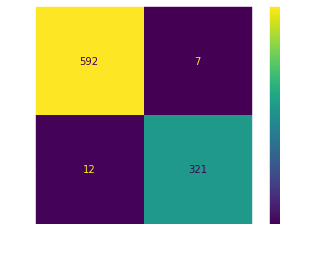

In [43]:
ut.model_selection(xgb, scale, X_train, y_train, X_test, y_test)

### Using Bagging Classifier

[Pipeline] ............. (step 1 of 2) Processing scale, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.1s
Accuracy Score: 0.982833
Precision Score: 0.98
Recall Score: 0.97
F1 Score: 0.98
Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       599
           1       0.98      0.97      0.98       333

    accuracy                           0.98       932
   macro avg       0.98      0.98      0.98       932
weighted avg       0.98      0.98      0.98       932
 



Predicted     
                  No  Yes
Actual No        594    5
       Yes        11  322

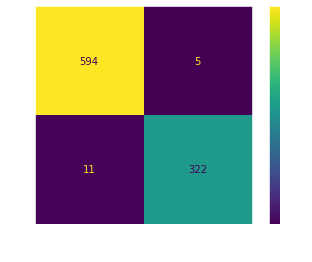

In [44]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier()
ut.model_selection(bag, scale, X_train, y_train, X_test, y_test)

### Using K Nearest Neighbors

[Pipeline] ............. (step 1 of 2) Processing scale, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.0s
Accuracy Score: 0.980687
Precision Score: 0.99
Recall Score: 0.96
F1 Score: 0.97
Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       599
           1       0.99      0.96      0.97       333

    accuracy                           0.98       932
   macro avg       0.98      0.98      0.98       932
weighted avg       0.98      0.98      0.98       932
 



Predicted     
                  No  Yes
Actual No        595    4
       Yes        14  319

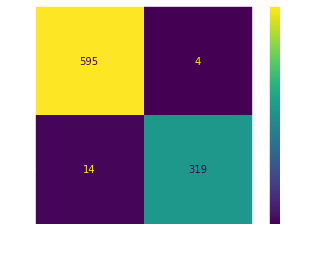

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
ut.model_selection(knn, scale, X_train, y_train, X_test, y_test)

## Performing Hyper-Parameter Optimization

* Decision Tree

In [46]:
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [47]:
params = {
    'max_depth': np.arange(1, 10, 1)
}

In [48]:
ut.param_optimization(tree, params, X_train, y_train, cv=10, jobs=-1)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best Estimator: 
 DecisionTreeClassifier(max_depth=3)
Best Score: 0.988 

Best Params: 
 {'max_depth': 3}


In [49]:
params = {
    'min_samples_leaf': np.arange(1, 20, 1)
}

In [50]:
ut.param_optimization(tree, params, X_train, y_train, cv=10, jobs=-1)

Fitting 10 folds for each of 19 candidates, totalling 190 fits
Best Estimator: 
 DecisionTreeClassifier(min_samples_leaf=8)
Best Score: 0.988 

Best Params: 
 {'min_samples_leaf': 8}


* Logistic Regression

In [51]:
log.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 800,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [52]:
params = {
    'penalty': ['l1', 'l2'],
    'max_iter': np.arange(100, 1000, 10)
}

In [53]:
ut.param_optimization(log, params, X_train, y_train, cv=10, jobs=-1)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


/Users/ahmedgaal/anaconda3/envs/gtd/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.95999236        nan 0.96267765        nan 0.96348266
        nan 0.96643533        nan 0.96858658        nan 0.96939376
        nan 0.97154285        nan 0.97207977        nan 0.97207905
        nan 0.97315359        nan 0.97342241        nan 0.97422814
        nan 0.97422814        nan 0.97422814        nan 0.97422814
        nan 0.97476578        nan 0.97476578        nan 0.97530197
        nan 0.97530197        nan 0.97557007        nan 0.97530125
        nan 0.97530125        nan 0.97557007        nan 0.97557007
        nan 0.97557007        nan 0.97557007        nan 0.97557007
        nan 0.97557007        nan 0.97557007        nan 0.97557007
        nan 0.97557007        nan 0.97557007        nan 0.97530197
        nan 0.97530197        nan 0.97557079        nan 0.97637724
        nan 0.97691343        na

Best Estimator: 
 LogisticRegression(max_iter=770)
Best Score: 0.984 

Best Params: 
 {'max_iter': 770, 'penalty': 'l2'}


/Users/ahmedgaal/anaconda3/envs/gtd/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* Support Vector Machines

In [54]:
svc.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [55]:
params = {
    'C': np.arange(0.01, 1.0, 0.1)
}

In [56]:
ut.param_optimization(svc, params, X_train, y_train, cv=10, jobs=-1)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Estimator: 
 SVC(C=0.21000000000000002, kernel='linear')
Best Score: 0.988 

Best Params: 
 {'C': 0.21000000000000002}


* Random Forest

In [58]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 7100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [59]:
params = {
    'n_estimators': np.arange(100, 10000, 1000)
}

In [60]:
ut.param_optimization(rf, params, X_train, y_train, cv=10, jobs=-1)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Estimator: 
 RandomForestClassifier(n_estimators=2100)
Best Score: 0.987 

Best Params: 
 {'n_estimators': 2100}


* Gradient Boosting

gbm.get_params()

In [89]:
params ={
    'n_estimators': np.arange(100, 10000, 1000),
    'learning_rate': np.arange(0.1, 1, 0.01)
}

In [90]:
ut.param_optimization(gbm, params, X_train, y_train, cv=10, jobs=-1)

Fitting 10 folds for each of 900 candidates, totalling 9000 fits


KeyboardInterrupt: 

******